In [205]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [68]:
data = "russian_passenger_air_service_2.csv"
df = pd.read_csv(data)
df.head()

,Airport name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year,Airport coordinates
0,Abakan,2020,13495.0,14940.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('91.399735'), Decimal('53.751351'))"
1,Aikhal,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('111.543324'), Decimal('65.957161'))"
2,Loss,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('125.398355'), Decimal('58.602489'))"
3,Amderma,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('61.577429'), Decimal('69.759076'))"
4,Anadyr (Carbon),2020,4255.0,4565.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('177.738273'), Decimal('64.713433'))"


In [69]:
df['Total'] = df['January'] + df['February'] + df['March'] + df['April'] + df['May'] + df['June'] + df['July'] + df['August'] + df['September'] + df['October'] + df['November'] + df['December']
df['Quarter_one'] = df['January'] + df['February'] + df['March']
df['Quarter_two'] = df['April'] + df['May'] + df['June']
df['Quarter_three'] = df['July'] + df['August'] + df['September']
df['Quarter_four'] = df['October'] + df['November'] + df['December']
df.dropna()
df.head()

,Airport name,Year,January,February,March,April,May,June,July,August,...,October,November,December,Whole year,Airport coordinates,Total,Quarter_one,Quarter_two,Quarter_three,Quarter_four
0,Abakan,2020,13495.0,14940.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,"(Decimal('91.399735'), Decimal('53.751351'))",28435.0,28435.0,0.0,0.0,0.0
1,Aikhal,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,"(Decimal('111.543324'), Decimal('65.957161'))",0.0,0.0,0.0,0.0,0.0
2,Loss,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,"(Decimal('125.398355'), Decimal('58.602489'))",0.0,0.0,0.0,0.0,0.0
3,Amderma,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,"(Decimal('61.577429'), Decimal('69.759076'))",0.0,0.0,0.0,0.0,0.0
4,Anadyr (Carbon),2020,4255.0,4565.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,"(Decimal('177.738273'), Decimal('64.713433'))",8820.0,8820.0,0.0,0.0,0.0


In [70]:
df_Pivot = df.pivot_table(index='Airport name', columns='Year', values='Total')
df_Pivot.head()

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Airport name,,,,,,,,,,,,,,
Abakan,74943.2,78232.3,65242.5,83420.6,85946.56,109597.25,139465.34,184347.38,179495.30,167963.01,170903.84,182091.93,194724.8,28435.0
Achinsk,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN
Aikhal,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
Amderma,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
Anadyr,81316.0,77290.0,70363.0,74103.0,75209.00,75563.00,85979.00,121849.17,76936.94,83138.43,87302.33,96477.53,NaN,NaN


In [71]:
df_Pivot.columns

Int64Index([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
            2018, 2019, 2020],
           dtype='int64', name='Year')

In [72]:
df_Pivot['Sum'] = df_Pivot.sum(axis=1)
df_Pivot.head()

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Sum
Airport name,,,,,,,,,,,,,,,
Abakan,74943.2,78232.3,65242.5,83420.6,85946.56,109597.25,139465.34,184347.38,179495.30,167963.01,170903.84,182091.93,194724.8,28435.0,1744809.01
Achinsk,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
Aikhal,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00
Amderma,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00
Anadyr,81316.0,77290.0,70363.0,74103.0,75209.00,75563.00,85979.00,121849.17,76936.94,83138.43,87302.33,96477.53,NaN,NaN,1005527.40


#### Investigating the 20 busiest airports in Russia since 2007

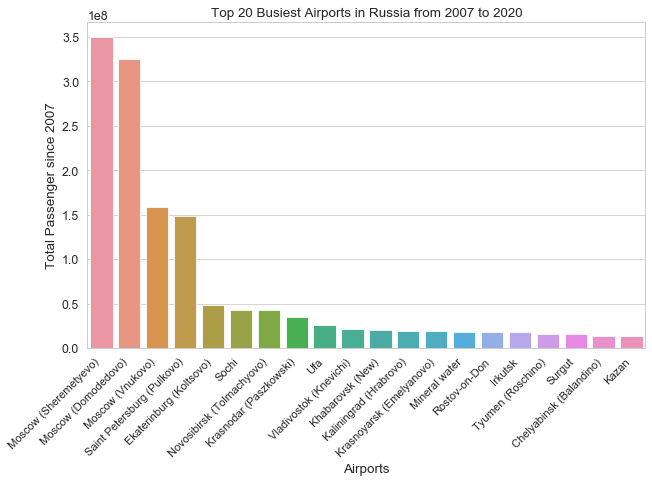

In [195]:
df_Pivot_20 = df_Pivot.nlargest(20, 'Sum')

sns.set(rc={'figure.figsize':(10,6)})
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=1.4)
sns.despine(left=True, bottom=True)

ax = sns.barplot(x = df_Pivot_20.index, y = df_Pivot_20['Sum']).set(title="Top 20 Busiest Airports in Russia from 2007 to 2020", xlabel = 'Airports', ylabel="Total Passenger since 2007")

plt.xticks(rotation=45, ha='right', fontweight='light', fontsize='small');
plt.savefig('Top_20_Busiest_Airports_in_Russia_from_2007_to_2020.jpeg', bbox_inches='tight')

#### Investigating top 10 busiest airports by months in Russia

In [131]:
#Group the data

Total_January = df.groupby("Airport name")['January'].mean()
Total_January_10 = Total_January.nlargest(10, keep='first')

Total_February = df.groupby("Airport name")['February'].mean()
Total_February_10 = Total_February.nlargest(10, keep='first')

Total_March = df.groupby("Airport name")['March'].mean()
Total_March_10 = Total_March.nlargest(10, keep='first')

Total_April = df.groupby("Airport name")['April'].mean()
Total_April_10 = Total_April.nlargest(10, keep='first')

Total_May = df.groupby("Airport name")['May'].mean()
Total_May_10 = Total_May.nlargest(10, keep='first')

Total_June = df.groupby("Airport name")['June'].mean()
Total_June_10 = Total_June.nlargest(10, keep='first')

Total_July = df.groupby("Airport name")['July'].mean()
Total_July_10 = Total_July.nlargest(10, keep='first')

Total_August = df.groupby("Airport name")['August'].mean()
Total_August_10 = Total_August.nlargest(10, keep='first')

Total_September = df.groupby("Airport name")['September'].mean()
Total_September_10 = Total_September.nlargest(10, keep='first')

Total_October = df.groupby("Airport name")['October'].mean()
Total_October_10 = Total_October.nlargest(10, keep='first')

Total_November = df.groupby("Airport name")['November'].mean()
Total_November_10 = Total_November.nlargest(10, keep='first')

Total_December = df.groupby("Airport name")['December'].mean()
Total_December_10 = Total_December.nlargest(10, keep='first')

##### Plot of top 10 busiest airports in Russia from January to December

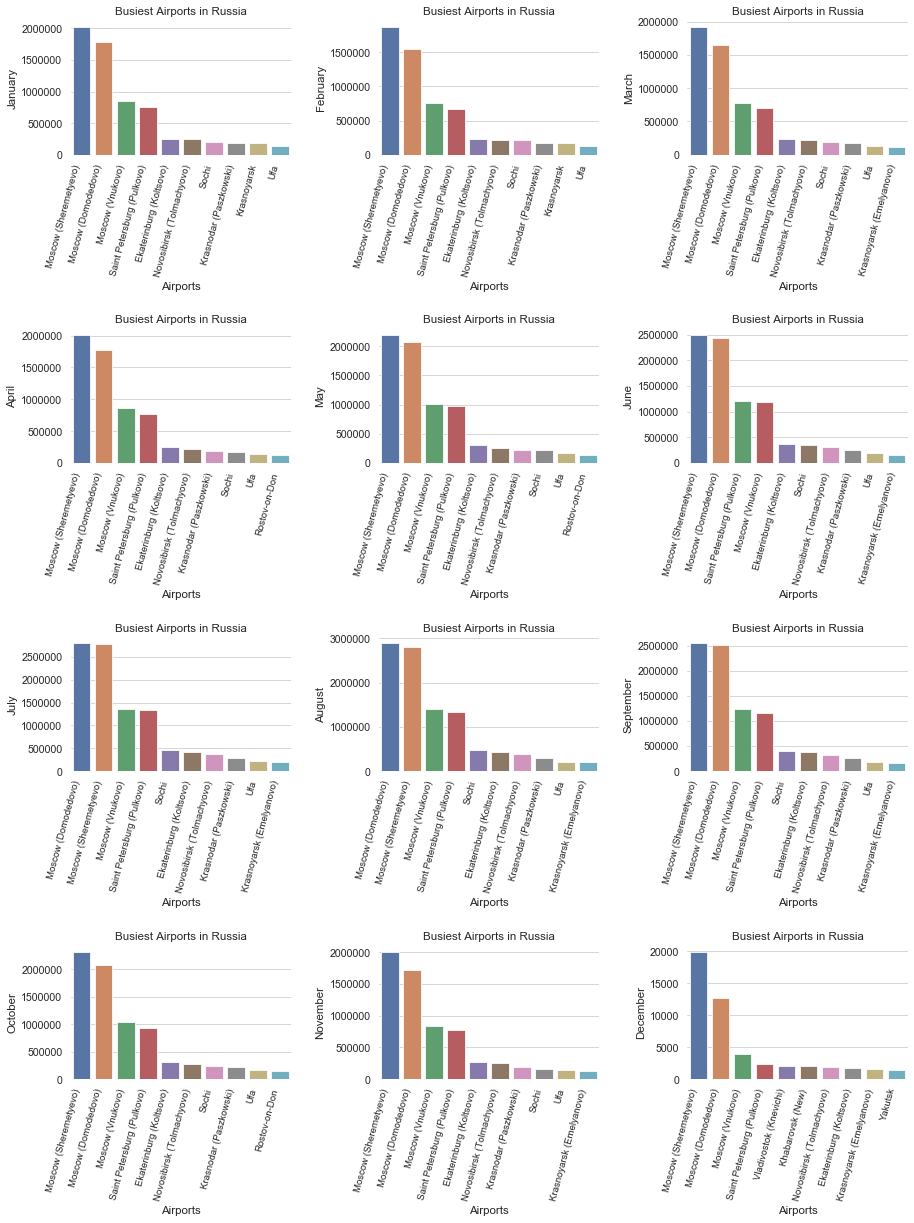

In [201]:
fig, ax = plt.subplots(figsize=(15,15), ncols=3, nrows=4)
sns.set(style='whitegrid', rc={"font.size":8,"axes.titlesize":10,"axes.labelsize":8})
sns.set_context("paper", font_scale=1.2)


sns.barplot(x = Total_January_10.axes[0], y = Total_January_10, ax=ax[0][0])
sns.barplot(x = Total_February_10.axes[0], y = Total_February_10, ax=ax[0][1])
sns.barplot(x = Total_March_10.axes[0], y = Total_March_10, ax=ax[0][2])
sns.barplot(x = Total_April_10.axes[0], y = Total_April_10, ax=ax[1][0])
sns.barplot(x = Total_May_10.axes[0], y = Total_May_10, ax=ax[1][1])
sns.barplot(x = Total_June_10.axes[0], y = Total_June_10, ax=ax[1][2])
sns.barplot(x = Total_July_10.axes[0], y = Total_July_10, ax=ax[2][0])
sns.barplot(x = Total_August_10.axes[0], y = Total_August_10, ax=ax[2][1])
sns.barplot(x = Total_September_10.axes[0], y = Total_September_10, ax=ax[2][2])
sns.barplot(x = Total_October_10.axes[0], y = Total_October_10, ax=ax[3][0])
sns.barplot(x = Total_November_10.axes[0], y = Total_November_10, ax=ax[3][1])
sns.barplot(x = Total_December_10.axes[0], y = Total_December_10, ax=ax[3][2])

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.3, wspace=0.4)
    

for ax in ax.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha='right', fontweight='light', fontsize='small');
    ax.axes.set_title("Busiest Airports in Russia");
    ax.axes.set_xlabel("Airports");
    
sns.despine(left=True, bottom=True)                                                   
plt.savefig('Busiest_Airport_by_Months_in_Russia.jpeg', bbox_inches='tight') 

##### Plot of top 10 busiest airports in Russia quarterly average

In [140]:
#Group the data by quarter

Total_Q1 = df.groupby("Airport name")['Quarter_one'].mean()
Total_Q1_10 = Total_Q1.nlargest(10, keep='first')

Total_Q2 = df.groupby("Airport name")['Quarter_two'].mean()
Total_Q2_10 = Total_Q2.nlargest(10, keep='first')

Total_Q3 = df.groupby("Airport name")['Quarter_three'].mean()
Total_Q3_10 = Total_Q3.nlargest(10, keep='first')

Total_Q4 = df.groupby("Airport name")['Quarter_three'].mean()
Total_Q4_10 = Total_Q4.nlargest(10, keep='first')

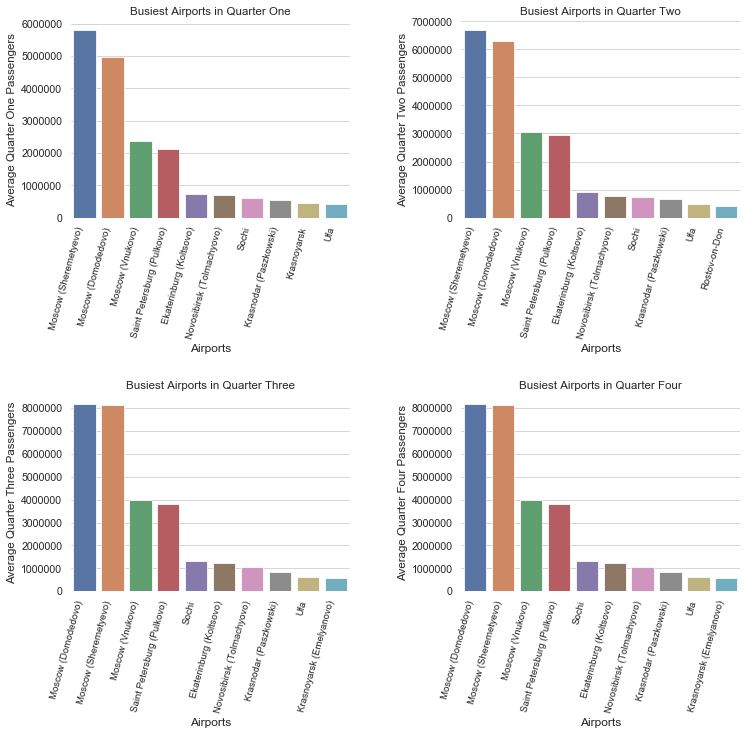

In [222]:
fig, axs = plt.subplots(figsize=(12,8), ncols=2, nrows=2)
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=1.2)


sns.barplot(x = Total_Q1_10.axes[0], y = Total_Q1_10, ax=axs[0][0]).set(title="Busiest Airports in Quarter One", ylabel="Average Quarter One Passengers")
sns.barplot(x = Total_Q2_10.axes[0], y = Total_Q2_10, ax=axs[0][1]).set(title="Busiest Airports in Quarter Two", ylabel="Average Quarter Two Passengers")
sns.barplot(x = Total_Q3_10.axes[0], y = Total_Q3_10, ax=axs[1][0]).set(title="Busiest Airports in Quarter Three", ylabel="Average Quarter Three Passengers")
sns.barplot(x = Total_Q4_10.axes[0], y = Total_Q4_10, ax=axs[1][1]).set(title="Busiest Airports in Quarter Four", ylabel="Average Quarter Four Passengers")

plt.subplots_adjust(top = 1.0, bottom=0.01, hspace=0.9, wspace=0.4)

   

for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha='right', fontweight='light', fontsize='small');
    ax.axes.set_xlabel("Airports",fontsize=12);
    
sns.despine(left=True, bottom=True)                                                   
plt.savefig('Busiest_Airport_by_Quarter_in_Russia.jpeg', bbox_inches='tight') #can be .pdf,png, tif, jpeg, etc

### Regression

In [202]:
Avg_Year_Values = df.groupby("Year")['Total'].mean()
Avg_Year_Values.head()

Year
2007    235542.278801
2008    263777.113356
2009    238034.724349
2010    296227.183219
2011    333226.974589
Name: Total, dtype: float64

In [203]:
x = Avg_Year_Values.axes[0].values.reshape(-1,1)
y = Avg_Year_Values.values.reshape(-1,1)
print(x.shape)
print(y.shape)

(14, 1)
(14, 1)


In [217]:
Poly_reg=PolynomialFeatures(degree=1) 
x_poly=Poly_reg.fit_transform(x)
Lin_reg = LinearRegression()
Lin_reg.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [218]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

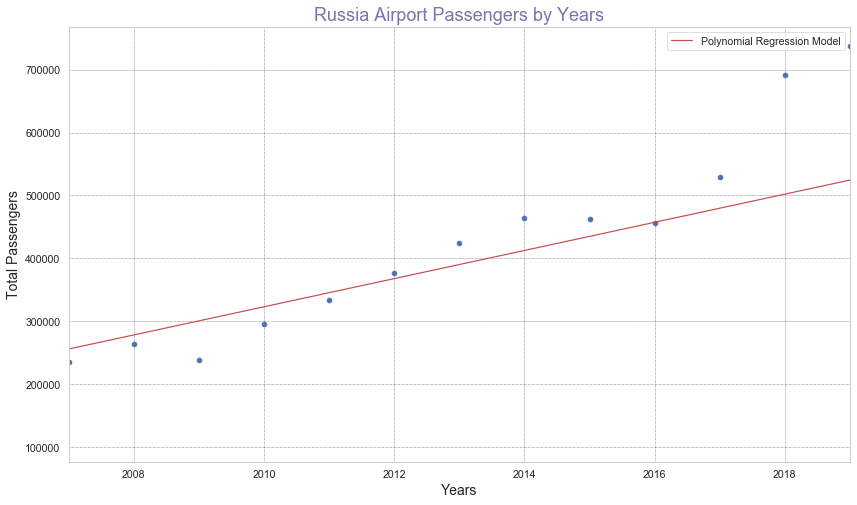

In [221]:
lin_reg = LinearRegression()
lin_reg.fit(x, y)

plt.figure(figsize=(14, 8))
plt.scatter(x,y)
plt.xlim(2007,2019)
plt.xlabel("Years",fontsize=14)
plt.ylabel("Total Passengers",fontsize=14)
plt.title("Russia Airport Passengers by Years",fontdict={'fontsize': 18, 'fontweight': 'medium'},color='m')
plt.grid(color='k', linestyle='dotted', linewidth=0.5)
y_pred=Lin_reg.predict(x_poly)
plt.plot(x,y_pred,color="r",label="Polynomial Regression Model")
plt.legend()
plt.show()

#### Forecasting

In [220]:
# Predicting total number of passengers in year(n) with Polymonial Regression
n = int(input());
Prediction = int(Lin_reg.predict(Poly_reg.fit_transform([[n]])));
print("The Predicted number of passengers ", n, "is", Prediction)

2028
The Predicted number of passengers  2028 is 725884
